# CENSUS INCOME PROJECT 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import os
import random
import IPython
import time
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
import json
from plotly.offline import init_notebook_mode
init_notebook_mode()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
df.iterrows

<bound method DataFrame.iterrows of        Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husban

In [5]:
df.shape

(32560, 15)

In [6]:
df.describe(include='all')

Age Workclass        Fnlwgt Education  Education_num  \
count   32560.000000     32560  3.256000e+04     32560   32560.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581634       NaN  1.897818e+05       NaN      10.080590   
std        13.640642       NaN  1.055498e+05       NaN       2.572709   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178315e+05       NaN       9.000000   
50%        37.000000       NaN  1.783630e+05       NaN      10.000000   
75%        48.000000       NaN  2.370545e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

             Marital_status       Occupation Relationship    Race    Sex  \
count                 32560            32560        32560   32560  32560   
unique                    7               15            6       5      2   
top      Married-civ-spouse   Prof-specialty      Husband   White   Male   
freq                  14976             4140        13193   27815  21789   
mean                    NaN              NaN          NaN     NaN    NaN   
std                     NaN              NaN          NaN     NaN    NaN   
min                     NaN              NaN          NaN     NaN    NaN   
25%                     NaN              NaN          NaN     NaN    NaN   
50%                     NaN              NaN          NaN     NaN    NaN   
75%                     NaN              NaN          NaN     NaN    NaN   
max                     NaN              NaN          NaN     NaN    NaN   

        Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
count   32560.000000  32560.000000    32560.000000           32560   32560  
unique           NaN           NaN             NaN              42       2  
top              NaN           NaN             NaN   United-States   <=50K  
freq             NaN           NaN             NaN           29169   24719  
mean     1077.615172     87.306511       40.437469             NaN     NaN  
std      7385.402999    402.966116       12.347618             NaN     NaN  
min         0.000000      0.000000        1.000000             NaN     NaN  
25%         0.000000      0.000000       40.000000             NaN     NaN  
50%         0.000000      0.000000       40.000000             NaN     NaN  
75%         0.000000      0.000000       45.000000             NaN     NaN  
max     99999.000000   4356.000000       99.000000             NaN     NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [10]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [11]:
df['Fnlwgt'].unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302], dtype=int64)

In [12]:
df['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [13]:
def handle_Captial_gain(df):
    df['Capital_gain']=np.where(df['Capital_gain'] == 0, np.nan,df['Captial_gain'])
    df['Capital_gain']=np.log(df['Capital_gain'])
    df['Capital_gain']=df['Capital_gain'].replace(np.nan,0),handle_Capital_gain(df)

In [14]:
df['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [15]:
def handle_Capital_loss(df):
    df['Capital_loss']=np.where(df['Capital_loss'] == 0, np.nan,df['Capital_loss'])
    df['Capital_loss']=np.log(df['Capital_loss'])
    df['Capital_loss']=df['Capital_loss'].replace(np.nan,0),handle_Capital_loss(df)

CORRELATION HEATMAP

In [16]:
corr=df.corr()
corr.shape

(6, 6)

In [17]:
corr

Age    Fnlwgt  Education_num  Capital_gain  Capital_loss  \
Age             1.000000 -0.076646       0.036527      0.077674      0.057775   
Fnlwgt         -0.076646  1.000000      -0.043159      0.000437     -0.010259   
Education_num   0.036527 -0.043159       1.000000      0.122627      0.079932   
Capital_gain    0.077674  0.000437       0.122627      1.000000     -0.031614   
Capital_loss    0.057775 -0.010259       0.079932     -0.031614      1.000000   
Hours_per_week  0.068756 -0.018770       0.148127      0.078409      0.054256   

                Hours_per_week  
Age                   0.068756  
Fnlwgt               -0.018770  
Education_num         0.148127  
Capital_gain          0.078409  
Capital_loss          0.054256  
Hours_per_week        1.000000

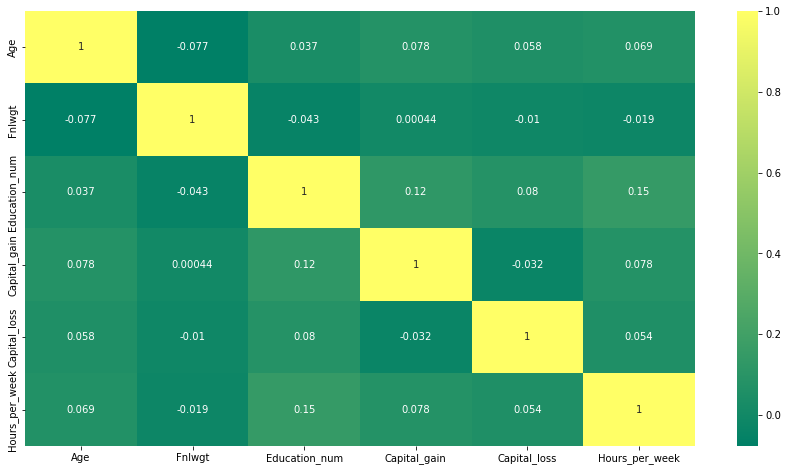

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='summer')
plt.show()

In [19]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

EDA

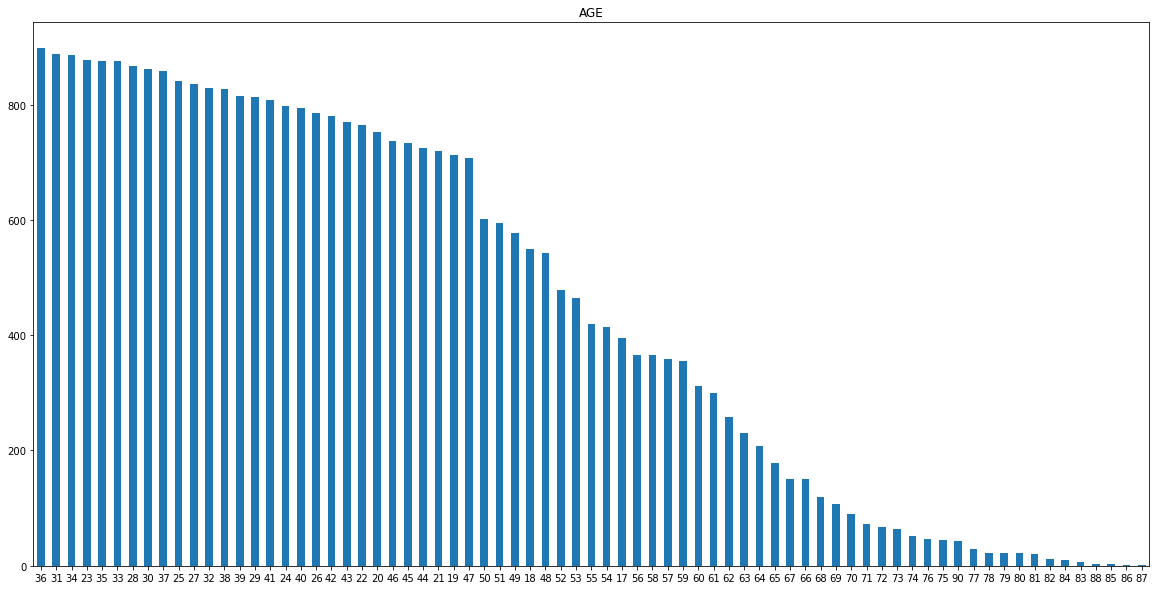

In [20]:
plt.subplot()
df['Age'].value_counts().plot(kind='bar',title='AGE',figsize=(20,10))
plt.xticks(rotation=0);

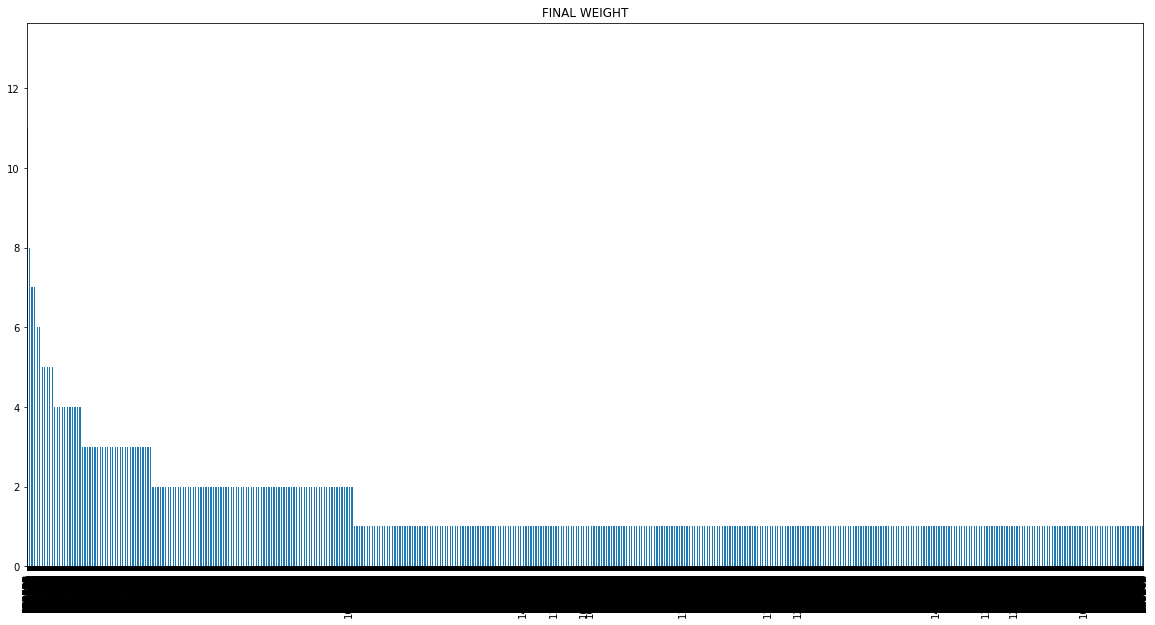

In [21]:
plt.subplot()
df['Fnlwgt'].value_counts().plot(kind='bar',title='FINAL WEIGHT',figsize=(20,10))
plt.xticks(rotation=90);

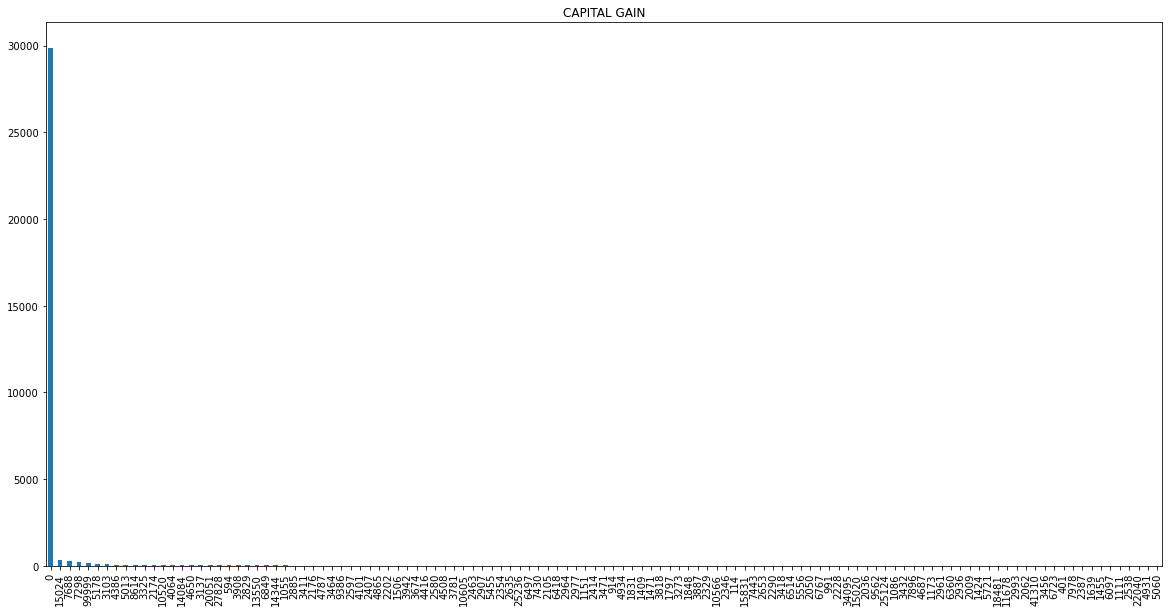

In [22]:
plt.subplot()
df['Capital_gain'].value_counts().plot(kind='bar',title='CAPITAL GAIN',figsize=(20,10))
plt.xticks(rotation=90);

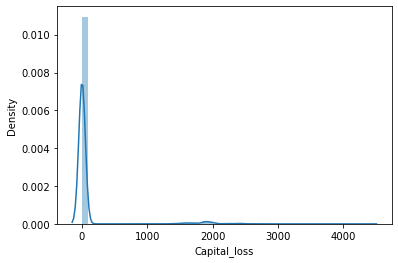

In [23]:
sns.distplot(df['Capital_loss']);

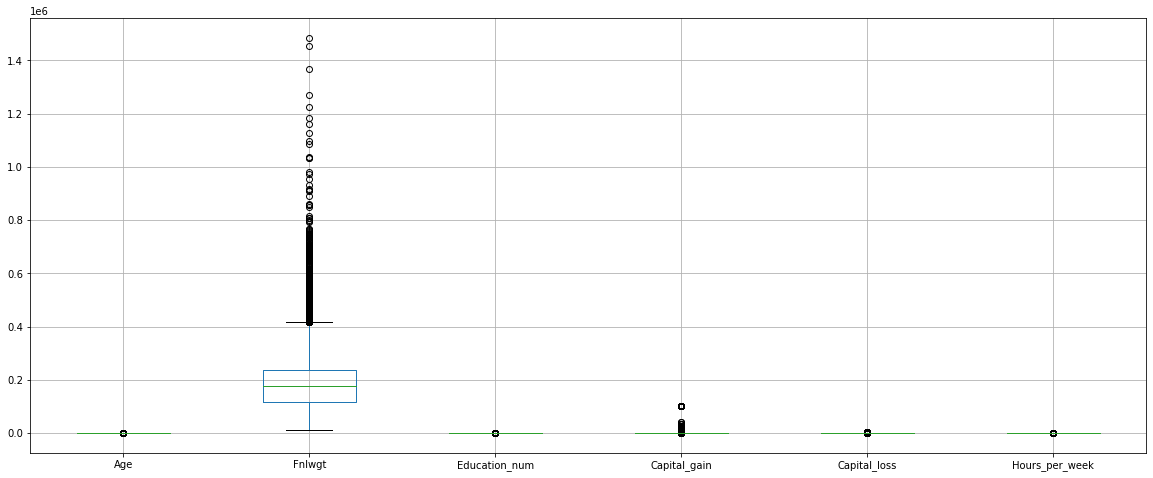

In [24]:
plt.figure(figsize=(20,8))
df.boxplot();

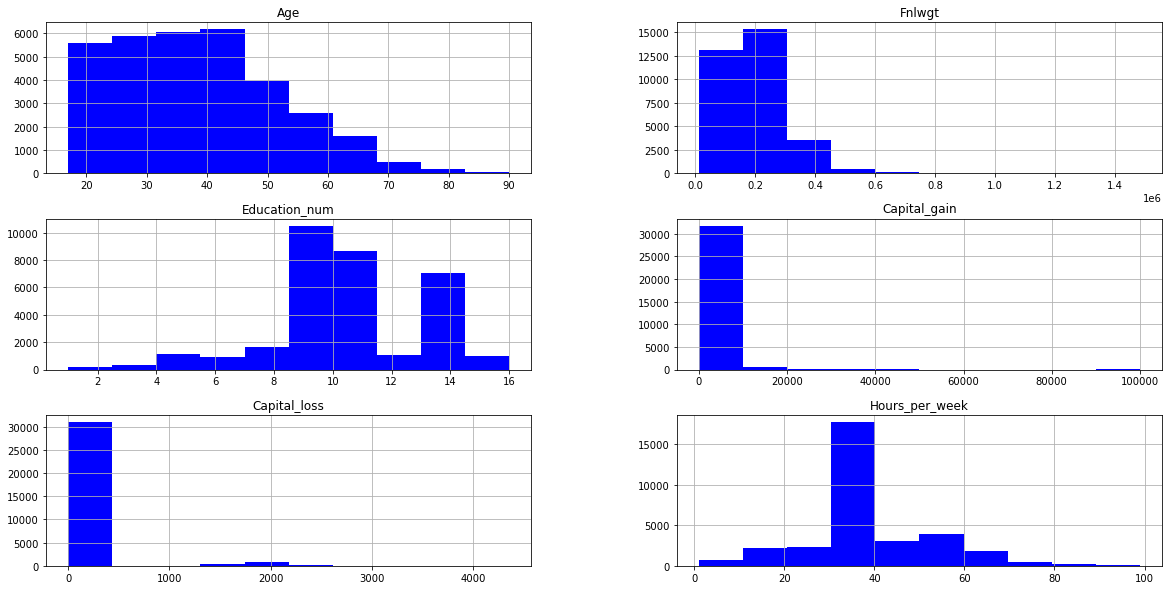

In [25]:
df.hist(color='b',figsize=(20,10))
plt.show()

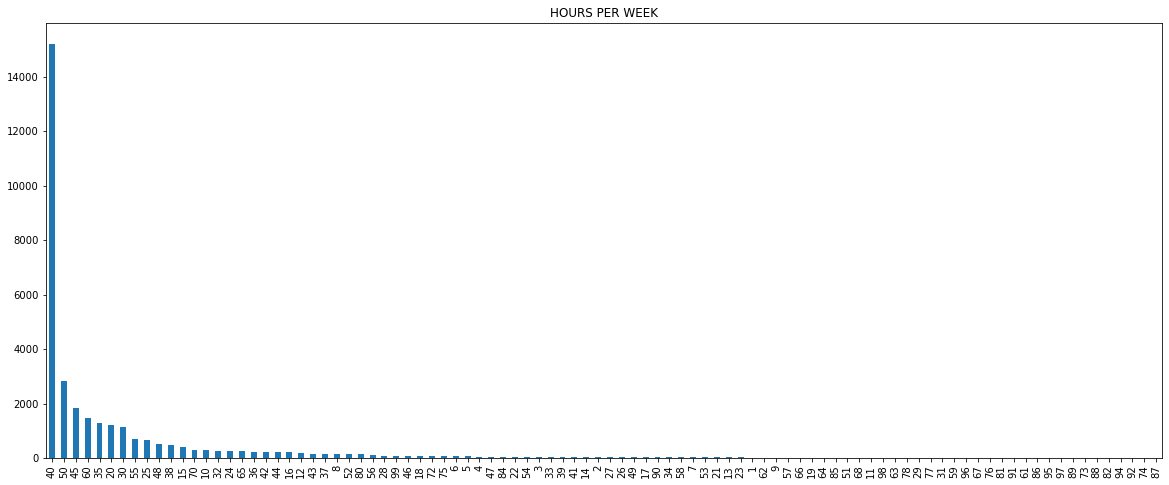

In [26]:
plt.subplot()
df['Hours_per_week'].value_counts().plot(kind='bar',title='HOURS PER WEEK',figsize=(20,8))
plt.xticks(rotation=90);

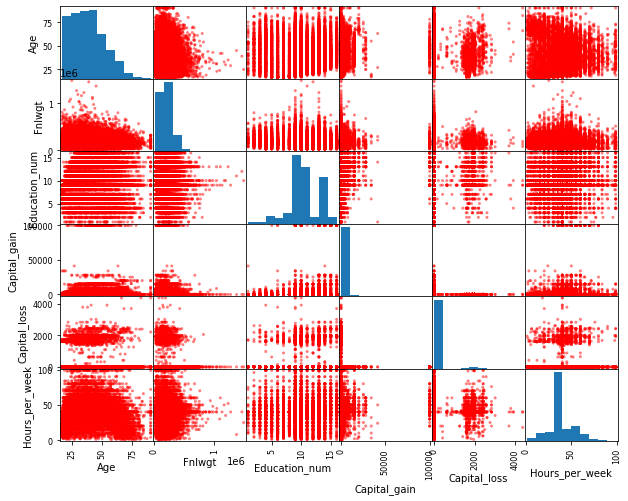

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,8),color='r')
plt.show()

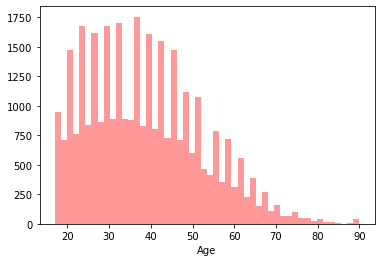

In [28]:
sns.distplot(df['Age'],kde=False,color='r')
plt.show()

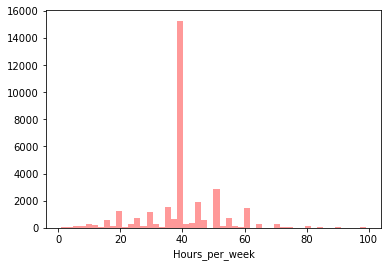

In [29]:
sns.distplot(df['Hours_per_week'],kde=False,color='r')
plt.show()

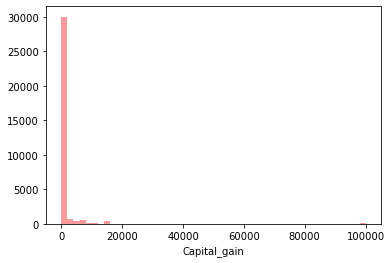

In [30]:
sns.distplot(df['Capital_gain'],kde=False,color='r')
plt.show()

              Capital_gain  Capital_loss
Capital_gain      1.000000     -0.031614
Capital_loss     -0.031614      1.000000


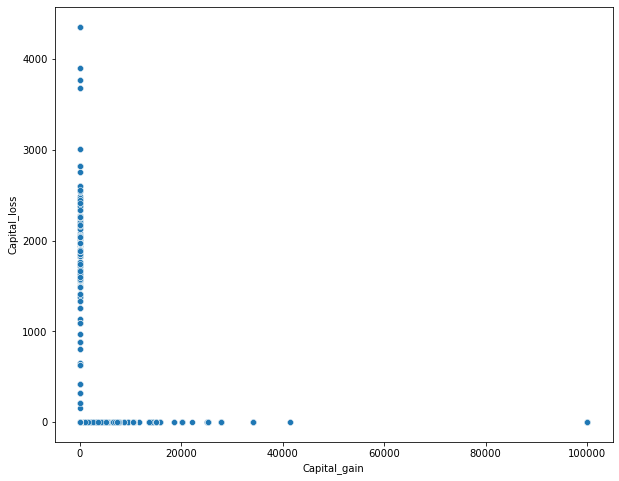

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['Capital_gain'], df['Capital_loss'])
print(df[['Capital_gain' , 'Capital_loss']].corr())
plt.show()

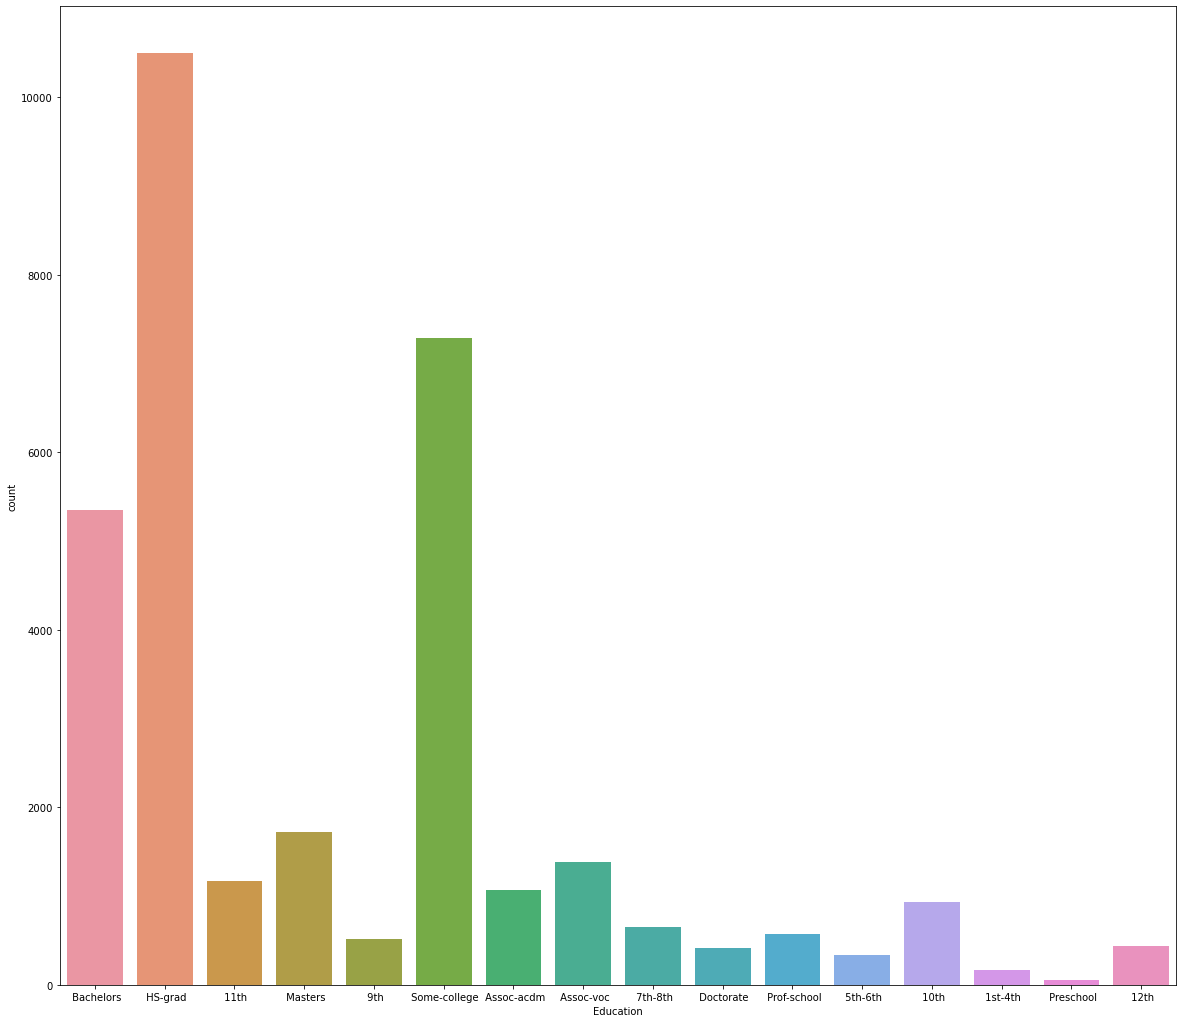

In [33]:
plt.figure(figsize=(20,18))
sns.countplot(df['Education'])
plt.show()

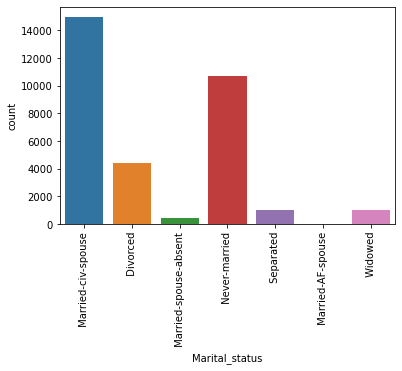

In [34]:
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)
plt.show()

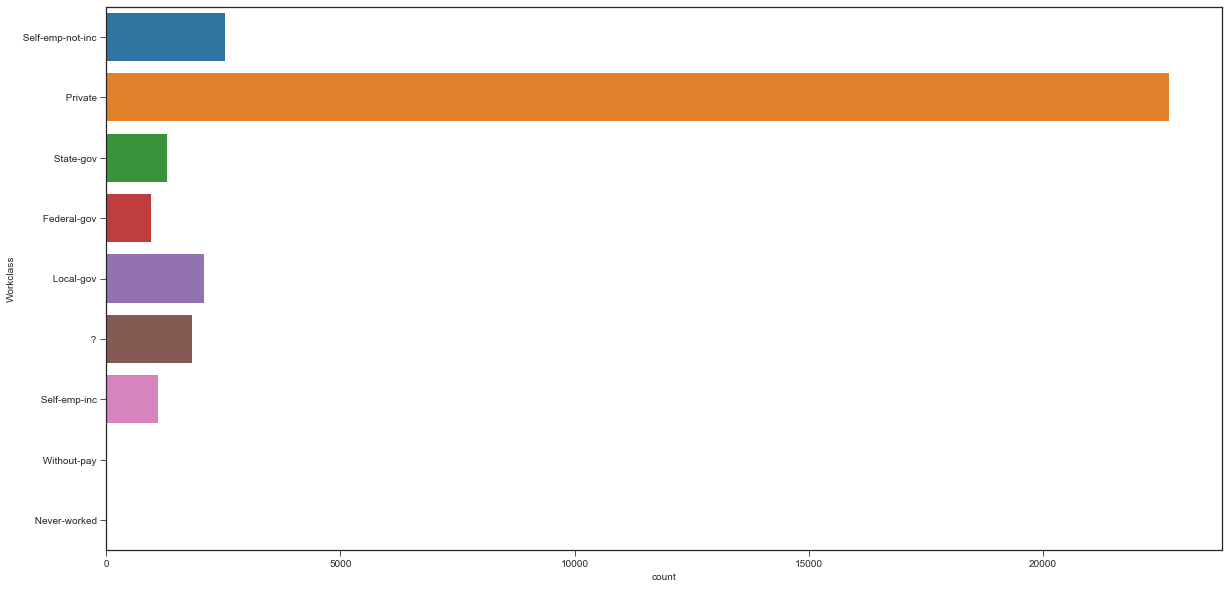

In [35]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,10))
sns.countplot(y="Workclass",data=df);

<AxesSubplot:xlabel='count', ylabel='Income'>

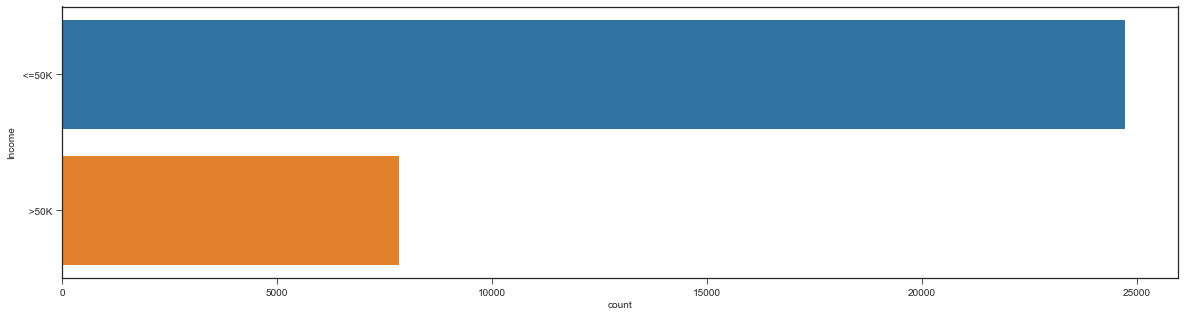

In [36]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(y="Income", data=df)

 higher the frequency of <=50k(less than equal to 50k) than >50k

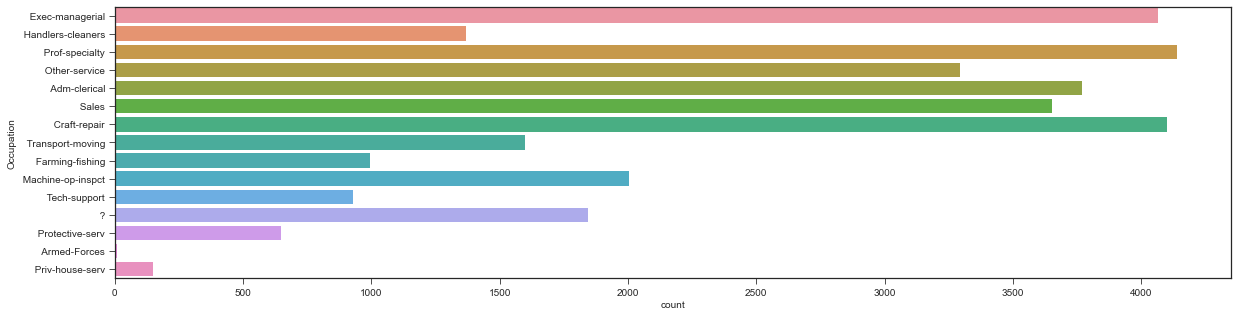

In [37]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(y='Occupation',data=df);

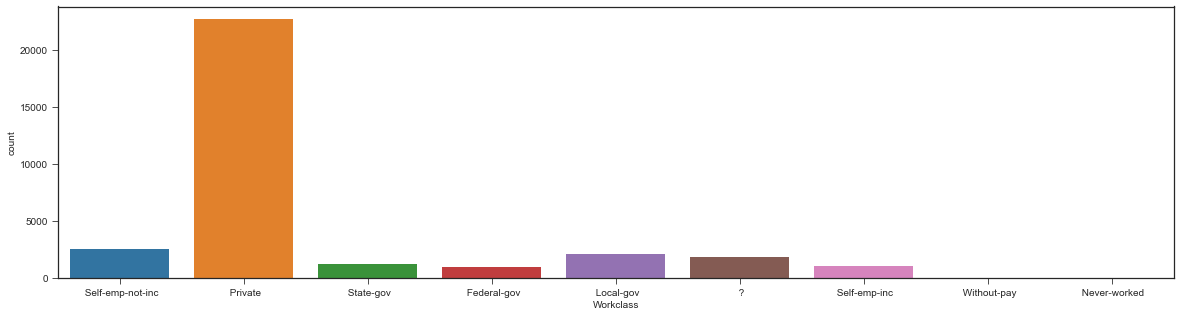

In [38]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(x='Workclass',data=df);

by using seaborn-ticks found out that the workclass area , the frequency of private company higher than others, self-emp-not-inc and local-gov workclass having same frequency

In [39]:
df['age'] = pd.cut(df['Age'], 20)

<AxesSubplot:xlabel='age'>

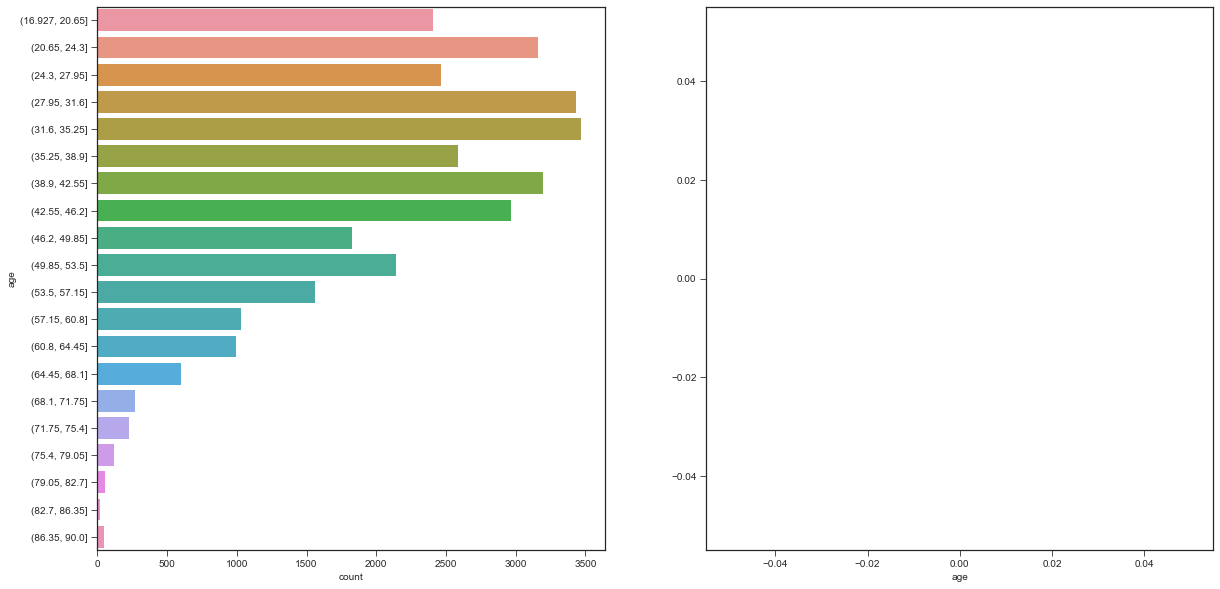

In [40]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(y="age",data=df)
plt.subplot(1,2,2)
sns.distplot(df[df['Income'] == '>50K']['age'],kde_kws={"label":">$50K"})
sns.distplot(df[df['Income'] == '<=50K']['age'],kde_kws={"label":"<=$50K"})

<AxesSubplot:xlabel='count', ylabel='Sex'>

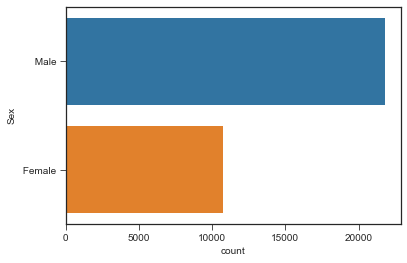

In [41]:
sns.countplot(y='Sex',data=df)

the frequency of male population greater than female

In [42]:
df[['Income' , 'Age']].groupby(['Income'], as_index=False).mean().sort_values(by='Age', ascending=False)

Income        Age
1    >50K  44.249841
0   <=50K  36.783648

higher the age the people's income get higher as shown above (showing >50k[INCOME] and [accuracy of AGE of people]44.24)

In [43]:
df[['Age' , 'Hours_per_week']].groupby(['Age'], as_index=False).mean().sort_values(by='Hours_per_week',ascending=False)

Age  Hours_per_week
27   44       44.129834
21   38       44.053204
33   50       43.953488
18   35       43.908676
32   49       43.753899
..  ...             ...
57   74       22.607843
64   81       21.700000
0    17       21.367089
65   82       17.416667
70   87        2.000000

[73 rows x 2 columns]

In [44]:
df['age_hours']=df['Age']*df['Hours_per_week']
df['age']=pd.cut(df['age_hours'], 10)

<AxesSubplot:xlabel='age'>

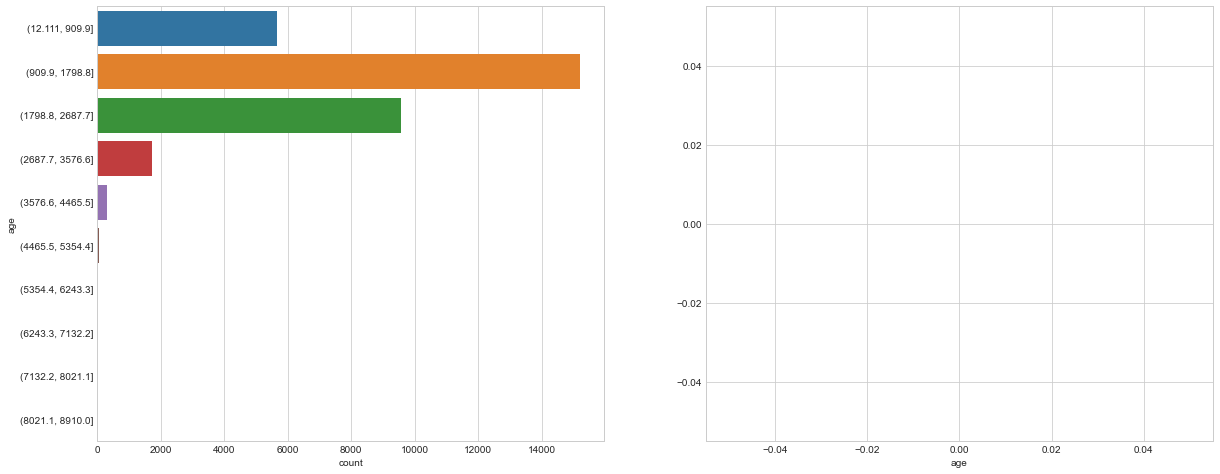

In [45]:
plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(y="age",data=df);
plt.subplot(1,2,2)
sns.distplot(df[df['Income'] == '>50K']['age'],kde_kws={"label":">$50K"})
sns.distplot(df[df['Income'] == '<=50K']['age'],kde_kws={"label":"<=$50K"})

In [46]:
df[['Education','Education_num']].groupby(['Education'],as_index=False).mean().sort_values(by='Education_num',ascending=False)

Education  Education_num
10      Doctorate           16.0
14    Prof-school           15.0
12        Masters           14.0
9       Bachelors           13.0
7      Assoc-acdm           12.0
8       Assoc-voc           11.0
15   Some-college           10.0
11        HS-grad            9.0
2            12th            8.0
1            11th            7.0
0            10th            6.0
6             9th            5.0
5         7th-8th            4.0
4         5th-6th            3.0
3         1st-4th            2.0
13      Preschool            1.0

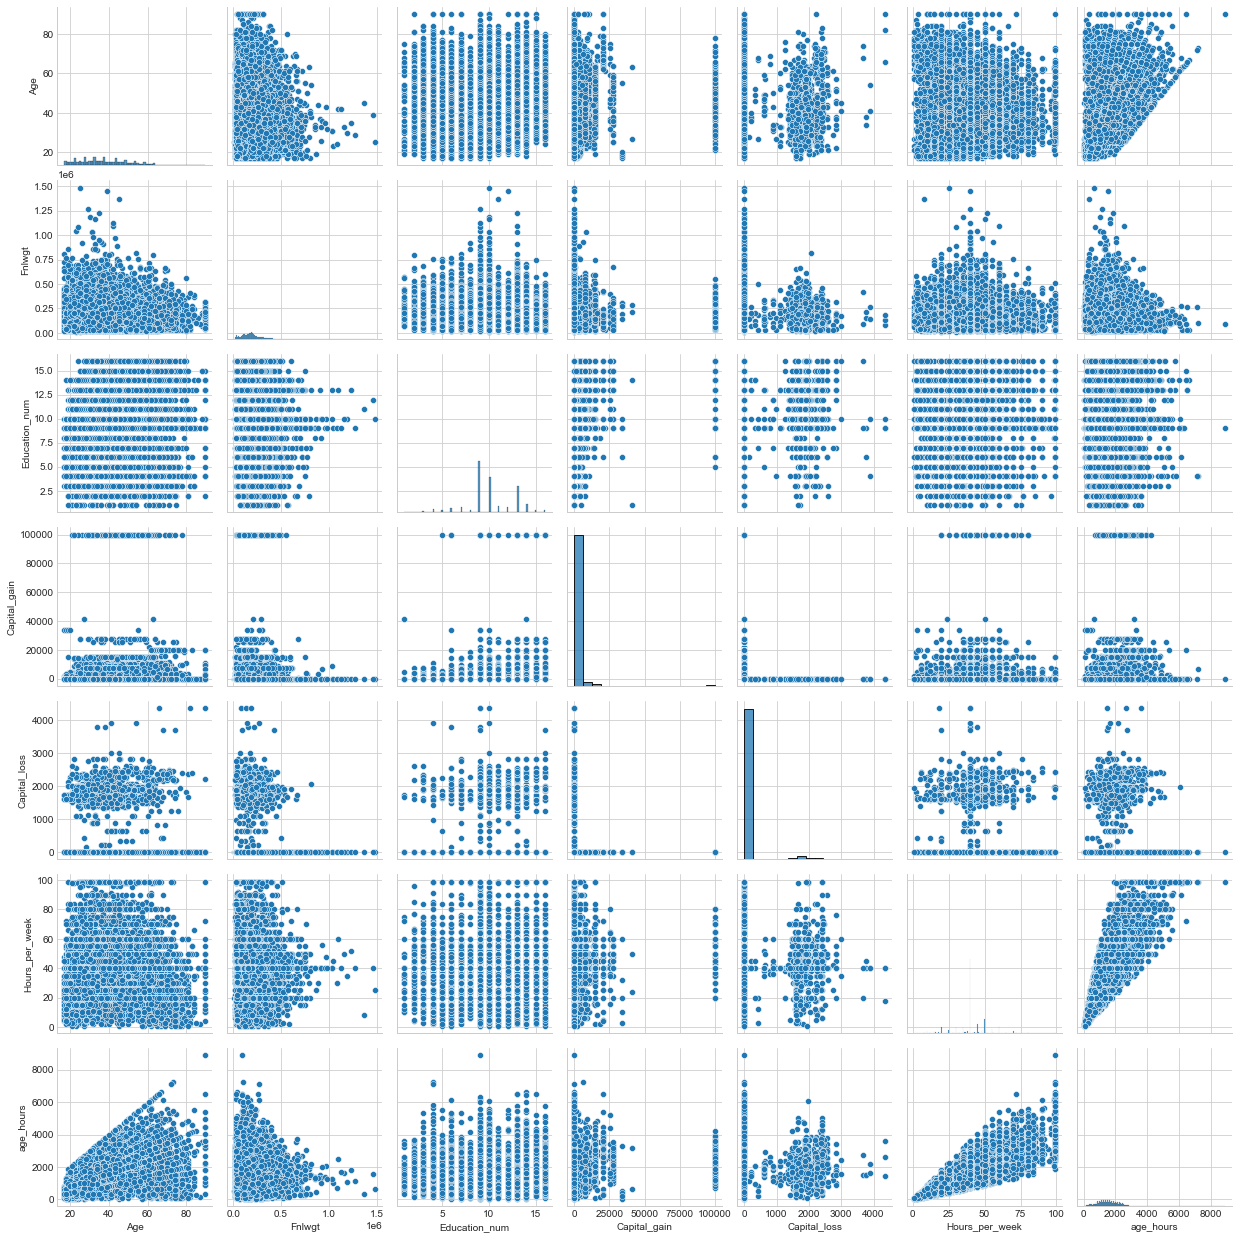

In [47]:
sns.pairplot(df)

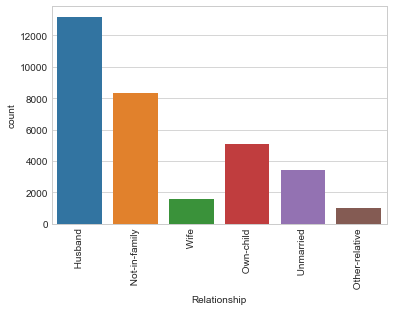

In [48]:
sns.countplot(df['Relationship'])
plt.xticks(rotation=90)
plt.show()

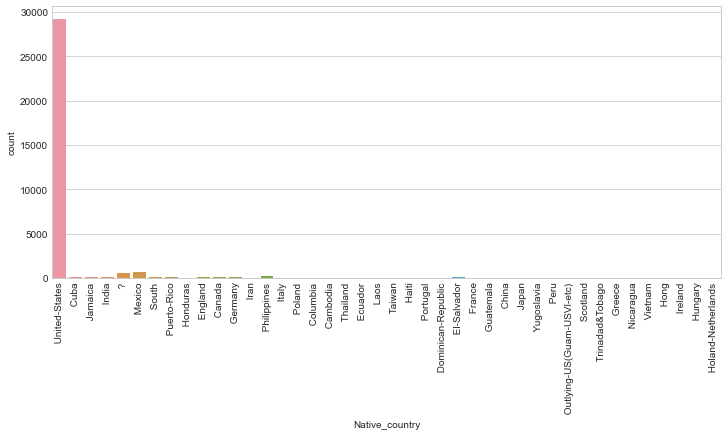

In [49]:
plt.figure(figsize=(12,5))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

frequency of United States are higher among other native countries

<Figure size 1440x1080 with 0 Axes>

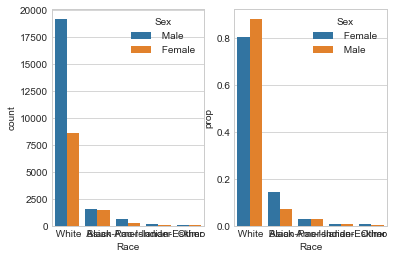

In [50]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "Race" , "prop" ,"Sex"
plt.figure(figsize=(20,15))
f, axes = plt.subplots(1, 2)
sns.countplot(x=x,hue=hue,data=df,ax=axes[0]);
prop_df=(df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index());
sns.barplot(x=x,y=y,hue=hue,data=prop_df,ax=axes[1]);

 higher frequency of white race male of about approx 18k, female is about 8k

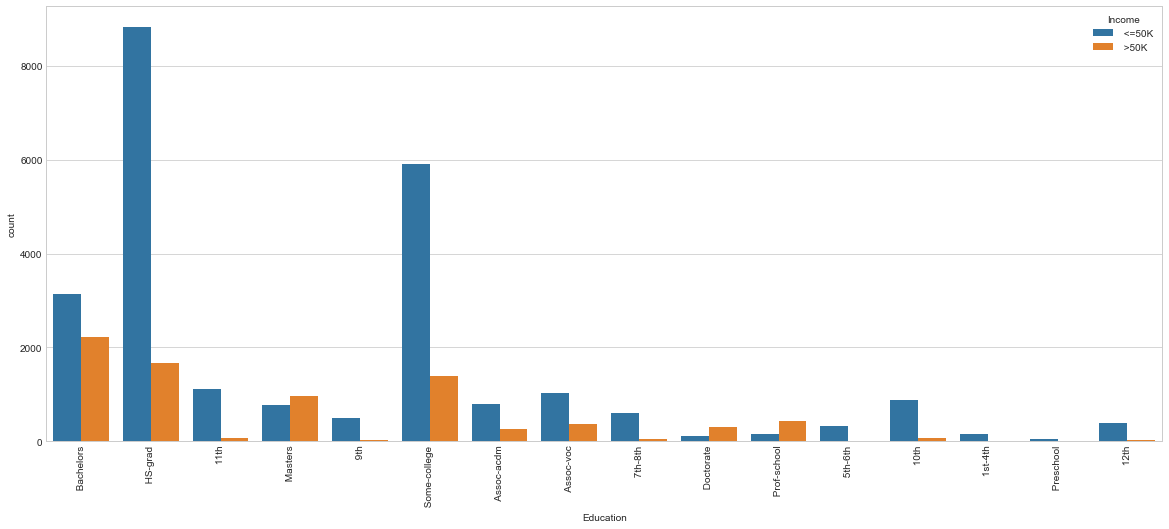

In [51]:
plt.figure(figsize=(20,8))
sns.countplot(x='Education', hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()

Higher Education makes better chance of earning of more than 50k

<AxesSubplot:xlabel='Occupation', ylabel='Age'>

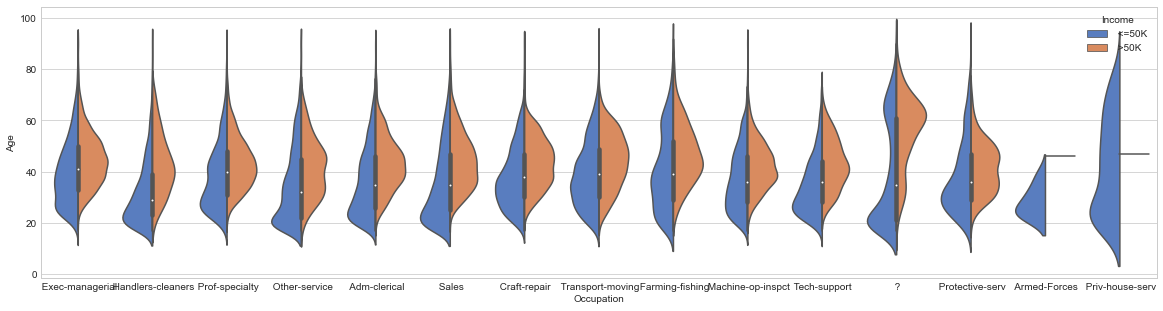

In [52]:
from matplotlib import pyplot
fig, ax=pyplot.subplots(figsize=(20,5))
ax = sns.violinplot(x="Occupation", y="Age", hue="Income", data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

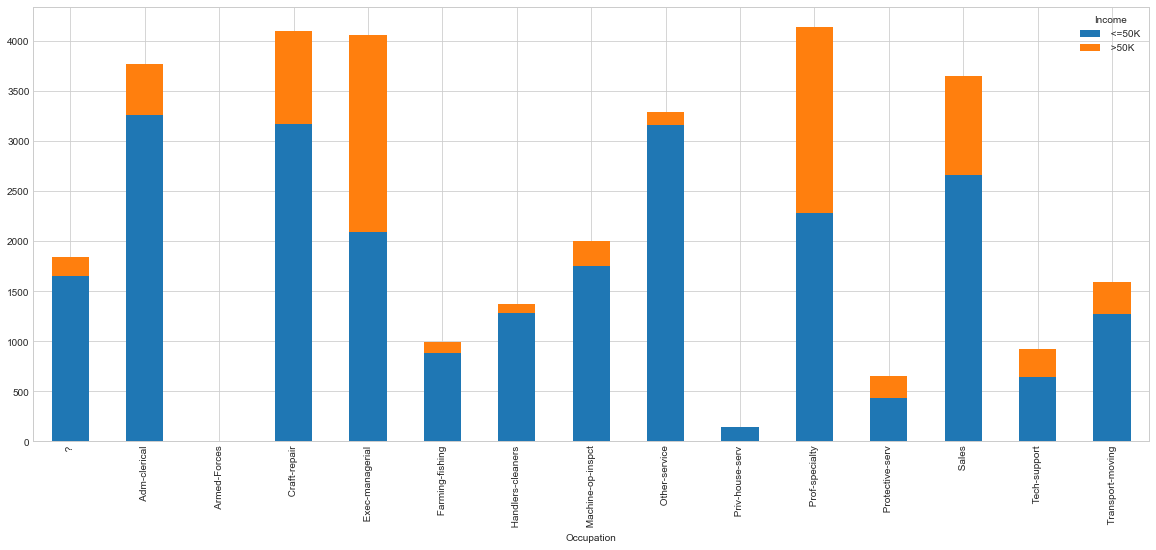

In [53]:
data=pd.crosstab(df['Occupation'], df['Income'])
data.plot.bar(stacked=True,figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

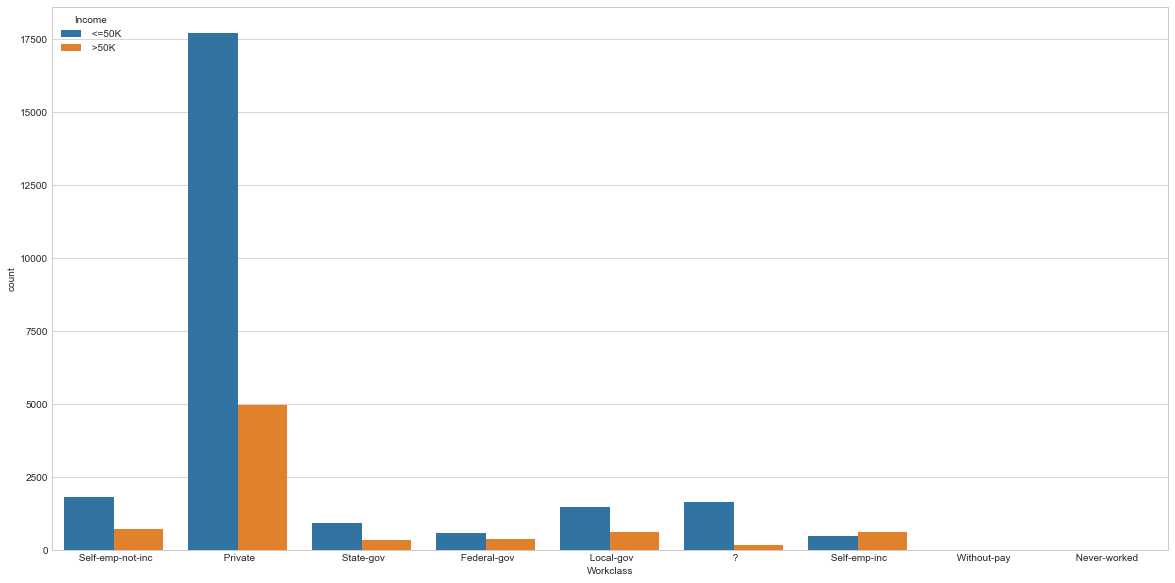

In [54]:
plt.figure(figsize=(20,10))
sns.countplot(x='Workclass', hue='Income', data=df)
plt.show()

private working class have highest no. of people of greater than 50k  therefore conversion ratio is minimal in private while in self_emp_inc (self employment income) have very high conversion ratio.

<AxesSubplot:xlabel='Race', ylabel='Age'>

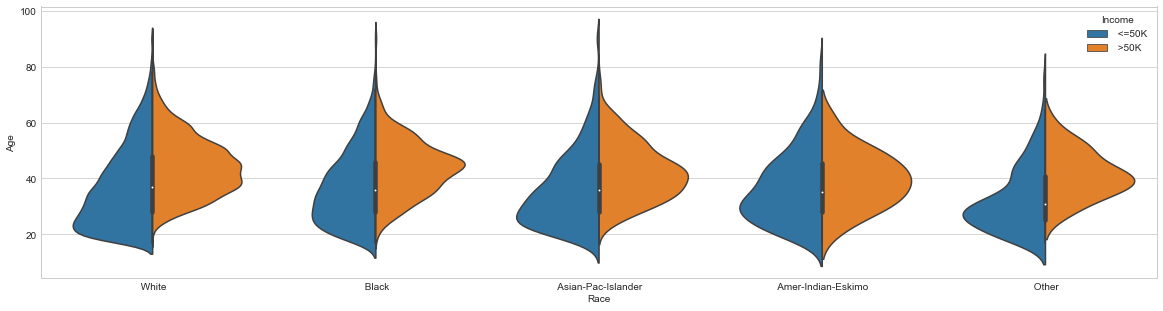

In [55]:
fig, ax=pyplot.subplots(figsize=(20,5))
ax = sns.violinplot(x="Race",y="Age",hue="Income",data=df, gridsize=100,split=True,saturation=0.75)
ax

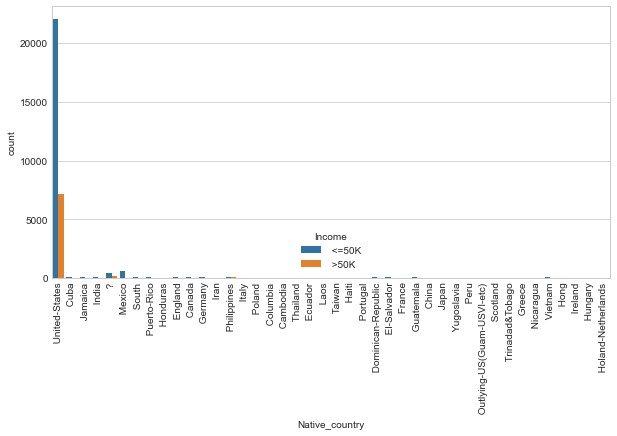

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x='Native_country',hue='Income', data=df)
plt.xticks(rotation=90)
plt.show()

no country having effect on their income and the higher frequency of the US

In [57]:
df['Income'] = LabelEncoder().fit_transform((df['Income']))

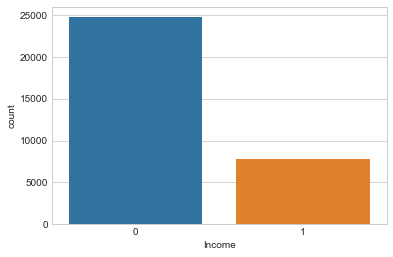

In [58]:
sns.countplot(df['Income'])
plt.show()

people with income less than 50k are higher.

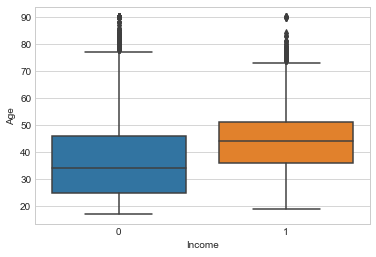

In [59]:
sns.boxplot(x='Income', y='Age', data=df)
plt.show()

average people's age is showing approx of 45 and for income >  50k which is more compared to income <=50k.

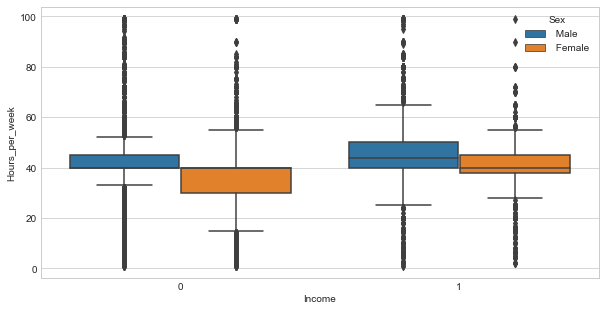

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Income'],df['Hours_per_week'], hue=df['Sex'])
plt.show()

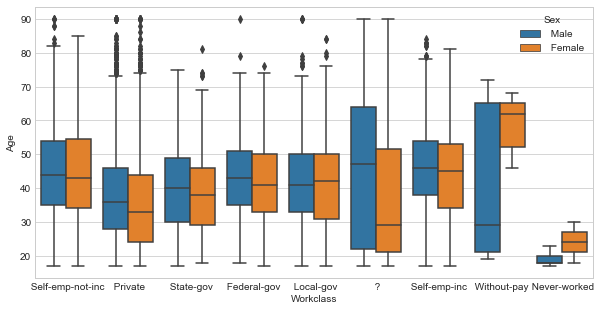

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Workclass'],df['Age'], hue=df['Sex'])
plt.show()

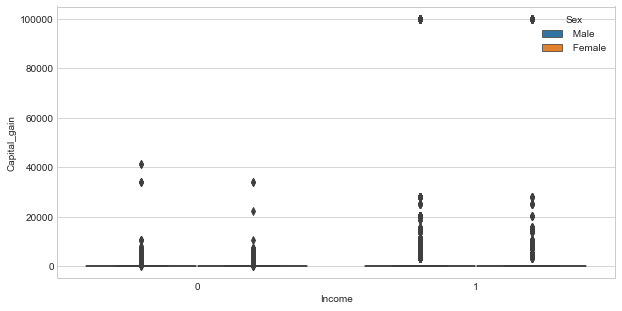

In [62]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Income'],df['Capital_gain'], hue=df['Sex'])
plt.show()

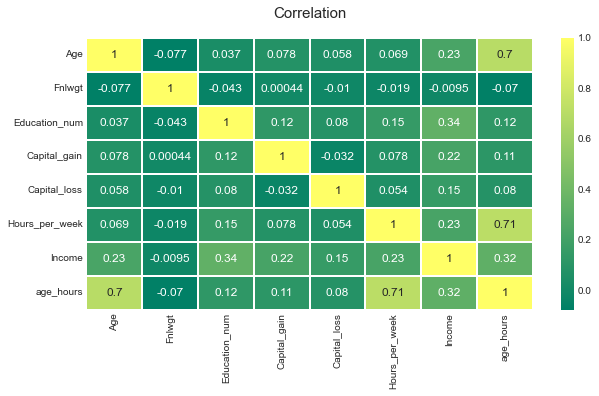

In [63]:
def correlation_heatmap(df):
    ax=plt.subplots(figsize=(10,5))
    colormap=sns.diverging_palette(220, 10, as_cmap = True)
    ax=sns.heatmap(df.corr(),cmap="summer",annot=True,linewidths=0.1,vmax=1.0,linecolor='white',annot_kws={'fontsize':12})
    plt.title('Correlation',y=1.05,size=15)

correlation_heatmap(df)

Building Models

In [64]:
# importing all mlpackages
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVR


import warnings
warnings.filterwarnings('ignore')

In [65]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
age               0
age_hours         0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32560 non-null  int64   
 1   Workclass       32560 non-null  object  
 2   Fnlwgt          32560 non-null  int64   
 3   Education       32560 non-null  object  
 4   Education_num   32560 non-null  int64   
 5   Marital_status  32560 non-null  object  
 6   Occupation      32560 non-null  object  
 7   Relationship    32560 non-null  object  
 8   Race            32560 non-null  object  
 9   Sex             32560 non-null  object  
 10  Capital_gain    32560 non-null  int64   
 11  Capital_loss    32560 non-null  int64   
 12  Hours_per_week  32560 non-null  int64   
 13  Native_country  32560 non-null  object  
 14  Income          32560 non-null  int32   
 15  age             32560 non-null  category
 16  age_hours       32560 non-null  int64   
dtypes: category(

In [69]:
X_train=df['Fnlwgt']
X_test=df['Sex']
y=df.Age

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.3,random_state=42)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(X_train, y_train)
pred = gbdt_clf.predict(X_train)

gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print("\n====================Train Result=====================")

print("Accuracy Score: ",accuracy_score(y_train,pred)*100 )

print("__________________________________________________")
print(f"CLASSIFICATION REPORT : \n{gbdt_clf_report}")
print("___________________________________________________")
print(f"Cofusion Matrix:  \n {confusion_matrix(y_train, pred)}\n")

#****************************Test score********************************

pred = gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("\n==================Test Result==========================")
print("Accuracy: ", accuracy_score(y_test,pred) * 100)
print("_____________________________________________")
print(f"CLASSIFICATION REPORT :\n{clf_report}")
print("______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")



====================Train Result=====================
Accuracy Score:  0.12723762723762724
__________________________________________________
CLASSIFICATION REPORT : 
              17     18     19     20     21     22     23     24     25  \
precision    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
recall       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
f1-score     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
support    290.0  403.0  486.0  551.0  500.0  518.0  626.0  569.0  607.0   

              26  ...   83   84   85   86   87   88    90  accuracy  \
precision    0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.001272   
recall       0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.001272   
f1-score     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.001272   
support    559.0  ...  5.0  7.0  3.0  1.0  1.0  2.0  31.0  0.001272   

              macro avg  weighted avg  
precision      0.041136      0.014198  
recall         

HYPERPARAMETER TUNING

In [72]:
from sklearn.model_selection import GridSearchCV
grid_param = {
      'max_depth' : range(4,8),
      'min_sample_split' : range(2,8,2),
      'learning_rate' : np.arange(0.1,0.3)
}

In [73]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred=randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test, y_test)
print('The accuracy of the Random Forest Model is ', score_randomforest)

The accuracy of the Random Forest Model is  0.10585585585585586


In [74]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred=knn.predict(X_test)
score_knn=knn.score(X_test,y_test)
print('The accuracy of the KNN Model is' , score_knn)

The accuracy of the KNN Model is 0.05784193284193284


In [75]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred=logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the LogisticRegression is', score_logreg)

The accuracy of the LogisticRegression is 0.025696150696150697


In [76]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred=logreg.predict(X_test)
score_svc=svc.score(X_test, y_test)
print('The accuarcy of SVC is', score_svc)

The accuarcy of SVC is 0.10595823095823095


the most accurate model are Random Forest and  SVC

# CONCLUSION 

people with higher the frequency of <=50k(less than equal to 50k) than >50k. by using seaborn-ticks found out that the workclass area , the frequency of private company higher than others, self-emp-not-inc and local-gov workclass having same frequency. the frequency of male population greater than female. higher the age the people's income get higher as shown above (showing >50k[INCOME] and [accuracy of AGE of people]44.24). frequency of United States are higher among other native countries. higher frequency of white race male of about approx 18k, female is about 8k. Higher Education makes better chance of earning of more than 50k. private working class have highest no. of people of greater than 50k therefore conversion ratio is minimal in private while in self_emp_inc (self employment income) have very high conversion ratio. no country having effect on their income and the higher frequency of the US. people with income less than 50k are higher. average people's age is showing approx of 45 and for income > 50k which is more compared to income <=50k. the most accurate model are Random Forest and SVC.

After this final submission my accuracy score was 78%.

# 

# THANK YOU